In [1]:
import pandas as pd
from fbprophet import Prophet
from DatenSammlung import DatenVergangenheitHolen, FeiertageHolen, WetterVorhersageNBG
from DatenVerarbeitung import DatenVerarbeitung

Importing plotly failed. Interactive plots will not work.
Today's date: 2021-04-04
Today's date: 2021-04-04


In [2]:
df = DatenVerarbeitung()

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>, <Period.RECENT: 'recent'>, <Period.NOW: 'now'>]
The combination of kl, daily, now is invalid.
100%|██████████| 1/1 [00:01<00:00,  1.71s/it]
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
WetterVorhersage = WetterVorhersageNBG()

  0%|          | 0/1 [00:00<?, ?it/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   0%|          | 0.00/37.2M [00:00<?, ?iB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   2%|▏         | 748k/37.2M [00:00<00:05, 7.59MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   4%|▍         | 1.45M/37.2M [00:00<00:04, 7.54MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   6%|▌         | 2.17M/37.2M [00:00<00:04, 7.48MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   8%|▊         | 2.89M/37.2M [00:00<00:04, 7.42MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:  10%|▉         | 3.61M/37.2M [00:00<00:04, 7.39MiB/s]
https://opendata.dwd.de/weathe

In [18]:
df_test = df

In [5]:
trainings_zeitraum_von = '2020-8-01'
df_test = df_test.loc[df_test.index>trainings_zeitraum_von].copy()

In [6]:
df_test= df_test.rename(columns={"7TIW": "y"})
df_test = df_test.reset_index()
df_test= df_test.rename(columns={"Date": "ds"})

In [7]:
df_test

,ds,y,Temperatur,ResNbg
0,2020-08-03,5.598456,18.4,57.87
1,2020-08-04,4.633205,16.3,57.87
2,2020-08-05,4.247104,18.1,57.87
3,2020-08-06,4.633205,20.9,57.87
4,2020-08-07,3.861004,24.2,59.72
...,...,...,...,...
230,2021-03-30,188.223938,11.8,75.00
231,2021-03-31,207.335907,13.1,75.00
232,2021-04-01,197.876448,14.1,75.00
233,2021-04-02,178.571429,7.9,75.00


<AxesSubplot:xlabel='Date'>

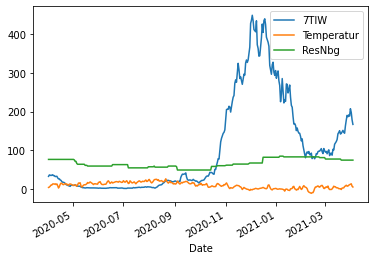

In [24]:
df_test.plot()

In [8]:
m = Prophet(changepoint_prior_scale=2)
m.add_country_holidays(country_name='DE')
m.add_regressor('Temperatur')
m.add_regressor('ResNbg')
m.fit(df_test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
#WetterVorhersage.head(20)

In [10]:
future = m.make_future_dataframe(periods=10,include_history=False)
future = future.set_index('ds')
#future.tail(20)

In [11]:
future['Temperatur'] = future.join(WetterVorhersage)
future['ResNbg'] = 75
future = future.reset_index()

In [12]:
#future.tail(20)

In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5,2021-04-09,199.029568,175.687861,223.859999
6,2021-04-10,201.108420,174.796032,227.440340
7,2021-04-11,209.200625,181.559675,241.593292
8,2021-04-12,212.517452,183.890319,245.344319
9,2021-04-13,215.672010,180.342311,256.163275


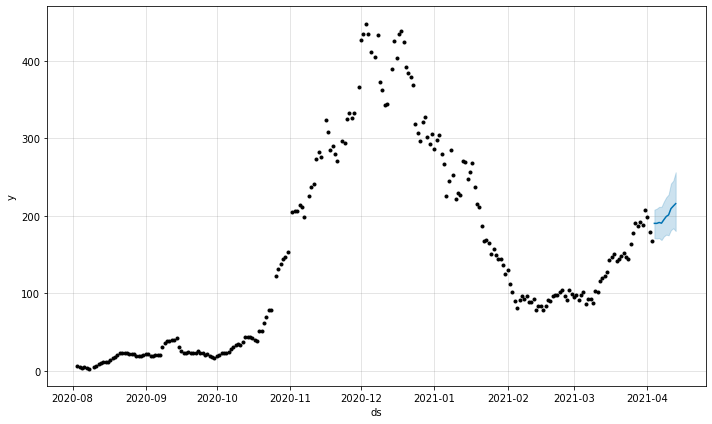

In [14]:
fig1 = m.plot(forecast)

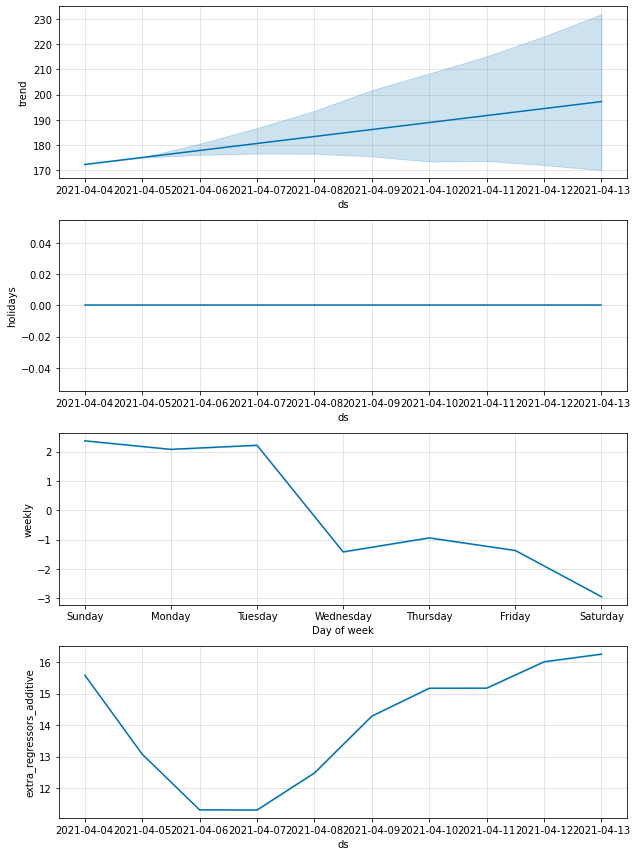

In [15]:
fig2 = m.plot_components(forecast)